In [465]:
import tensorflow as tf    # 导入Tensorflow
import numpy as np     # 导入numpy
import matplotlib.pyplot as plt # 导入matplotlib

# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会在网页里显示图像
%matplotlib inline

print("Tensorflow版本是：",tf.__version__) #显示当前TensorFlow版本

Tensorflow版本是： 2.6.0


In [466]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

In [467]:
print("Train image shape:",train_images.shape,"Train label shape:",train_labels.shape)
print("Test image shape:",test_images.shape,"Test label shape:",test_labels.shape)

Train image shape: (60000, 28, 28) Train label shape: (60000,)
Test image shape: (10000, 28, 28) Test label shape: (10000,)


In [468]:
def get_batch(train_data, train_label, batch_size):
    # 从数据集中随机取出batch_size个元素并返回
    index = np.random.randint(0, np.shape(train_data)[0], batch_size)
    return train_data[index, :], train_label[index]

In [469]:
print("image data:",test_images[1])
print("label data:",test_labels[1])

image data: 2
label data: 2


In [470]:
# 定义可视化函数
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28))
    plt.show()

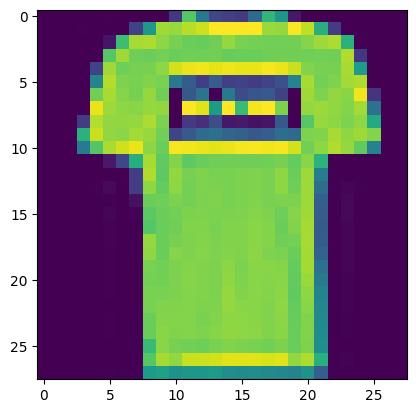

In [471]:
plot_image(train_images[1])

In [472]:
# 划分验证集
total_num = len(train_images)
valid_split = 0.2    # 验证集的比例占20%
train_num = int(total_num*(1-valid_split))    #训练集的数目

train_x = train_images[:train_num]    # 前部分给训练集
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]   # 后20%给验证集
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

valid_x.shape
# train 48000
# valid 12000
# test 10000 

(12000, 28, 28)

In [473]:
# 把（28 28）的结构拉直为一行 784
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x = test_x.reshape(-1,784)

In [474]:
# 特征归一化
train_x = tf.cast(train_x/255.0, tf.float32)
valid_x = tf.cast(valid_x/255.0, tf.float32)
test_x = tf.cast(test_x/255.0, tf.float32)

In [475]:
# one-hot coding
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

### 模型构建

In [476]:
# 向前运算
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

### 创建变量

In [477]:
# 定义变量
W = tf.Variable(tf.random.normal([784, 10],mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]),dtype = tf.float32) 

In [478]:
# 定义交叉熵损失函数

def loss(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)  # 求均值，得出均方差.

In [479]:
# 模型训练
training_epochs = 50 # 训练轮数
batch_size = 32  # 单次训练样本数（批次大小）
learning_rate= 0.0008  # 学习率

In [480]:
# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])# 返回梯度向量

In [481]:
#Adam优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [482]:
def accuracy(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    # 检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 准确率，将布尔值转化为浮点数，并计算平均值
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

In [483]:
total_step= int(train_num/batch_size)  # 一轮训练有多少批次

loss_list_train = [] # 用于保存训练集loss值的列表
loss_list_valid = [] # 用于保存验证集loss值的列表
acc_list_train = [] # 用于保存训练集Acc值的列表
acc_list_valid = [] # 用于保存验证集Acc值的列表

for epoch in range (training_epochs):
    for step in range(total_step):
        xs = train_x[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]
        xs = tf.reshape(xs,(-1,784))
        grads = grad(xs, ys, W, B)# 计算梯度
        optimizer.apply_gradients(zip(grads, [W,B])) # 优化器根据梯度自动调整变量w和b
    
    loss_train = loss(train_x, train_y, W, B).numpy()   # 计算当前轮训练损失
    loss_valid = loss(valid_x, valid_y, W, B).numpy()   # 计算当前轮验证损失
    acc_train = accuracy(train_x, train_y, W, B).numpy() 
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy() 
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d},train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}".format(epoch+1, loss_train, acc_train,loss_valid, acc_valid))

epoch=  1,train_loss=1.8063,train_acc=0.6320,val_loss=1.7876,val_acc=0.6299
epoch=  2,train_loss=1.3092,train_acc=0.7115,val_loss=1.3164,val_acc=0.7079
epoch=  3,train_loss=1.1009,train_acc=0.7476,val_loss=1.1252,val_acc=0.7392
epoch=  4,train_loss=0.9769,train_acc=0.7675,val_loss=1.0136,val_acc=0.7577
epoch=  5,train_loss=0.8952,train_acc=0.7800,val_loss=0.9402,val_acc=0.7690
epoch=  6,train_loss=0.8345,train_acc=0.7875,val_loss=0.8859,val_acc=0.7805
epoch=  7,train_loss=0.7870,train_acc=0.7948,val_loss=0.8443,val_acc=0.7860
epoch=  8,train_loss=0.7489,train_acc=0.8017,val_loss=0.8114,val_acc=0.7908
epoch=  9,train_loss=0.7175,train_acc=0.8067,val_loss=0.7843,val_acc=0.7957
epoch= 10,train_loss=0.6910,train_acc=0.8104,val_loss=0.7616,val_acc=0.7981
epoch= 11,train_loss=0.6673,train_acc=0.8138,val_loss=0.7410,val_acc=0.8013
epoch= 12,train_loss=0.6475,train_acc=0.8171,val_loss=0.7238,val_acc=0.8048
epoch= 13,train_loss=0.6300,train_acc=0.8198,val_loss=0.7086,val_acc=0.8068
epoch= 14,tr

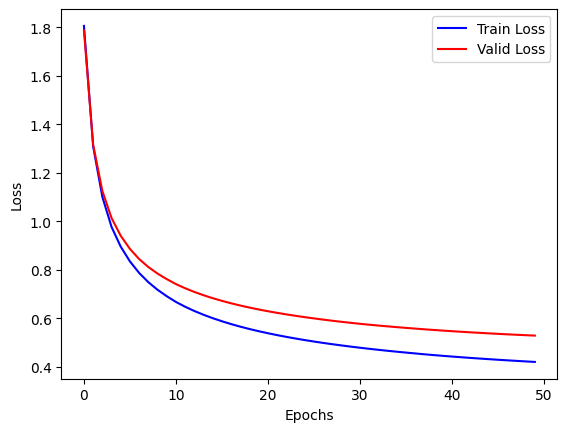

In [484]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)# 通过参数loc指定图例位置

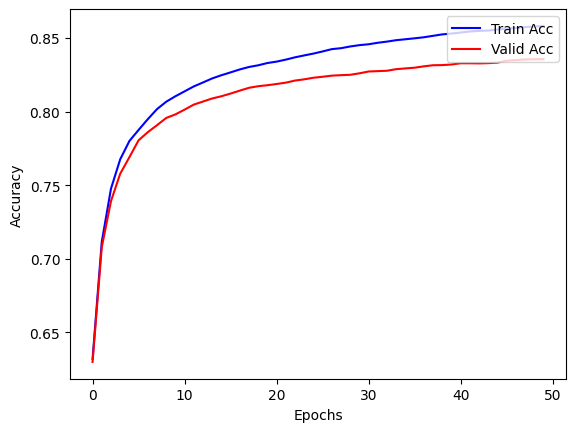

In [485]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train,'blue',label="Train Acc")
plt.plot(acc_list_valid,'red',label="Valid Acc")
plt.legend(loc=1)# 通过参数loc指定图例位置

### 模型评估

In [504]:
acc_test = accuracy(test_x, test_y, W, B).numpy() 
print("Test accuracy:",acc_test)

Test accuracy: 0.8384400272369384


In [499]:
pred  =model(test_x,W,B)
result = tf.argmax(pred, 1).numpy()
result

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [500]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,      # 图像列表
                                  labels,      # 标签列表
                                  preds,  # 预测值列表
                                  index=0,       # 从第index个开始显示
                                  num=10 ):    # 缺省一次显示 10 幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 25: 
        num = 25            # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5, i+1) # 获取当前要处理的子图
        
        ax.imshow(np.reshape(images[index],(28, 28)), cmap='binary') # 显示第index个图像                
            
        title = "label=" + str(labels[index])  # 构建该图上要显示的title信息
        if len(preds)>0:
            title += ",predict=" + str(preds[index]) 
            
        ax.set_title(title,fontsize=10)   # 显示图上的title信息
        ax.set_xticks([]);  # 不显示坐标轴
        ax.set_yticks([])        
        index = index + 1 
    plt.show()

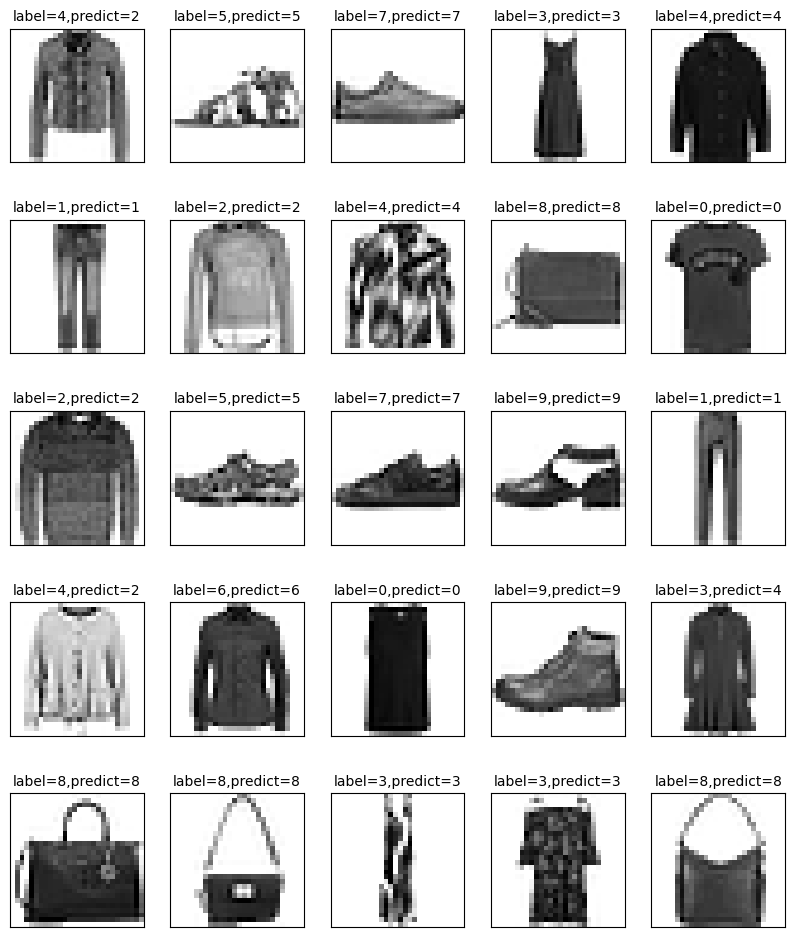

In [501]:
plot_images_labels_prediction(test_images, test_labels,result,10,25)